### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
# prompt: Quiero añadir una nueva columna llamada número de tienda para el url llamado URL el número de tienda será tienda 1, Para el URL dos el número de tiendas será tienda 2 y asi con las demas sucesivamente

loja['Número de tienda'] = 'Tienda 1'
loja2['Número de tienda'] = 'Tienda 2'
loja3['Número de tienda'] = 'Tienda 3'
loja4['Número de tienda'] = 'Tienda 4'



In [3]:
#  Como todas las hojas tienen los mismos encabezados me gustaría unirlos en una sola tabla llamada hoja completa

import pandas as pd
hoja_completa = pd.concat([loja, loja2, loja3, loja4])
hoja_completa

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Número de tienda
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Tienda 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Tienda 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Tienda 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Tienda 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,Mesa de jantar,moveis,303.60,16.852799,12/02/2020,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Tienda 4
2354,Cadeira de escritório,moveis,456.02,24.812798,17/05/2022,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Tienda 4
2355,Copo térmico,esporte e lazer,48.99,3.139675,03/05/2022,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Tienda 4
2356,Jogo de panelas,utilidades domesticas,202.45,11.062979,15/06/2020,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Tienda 4


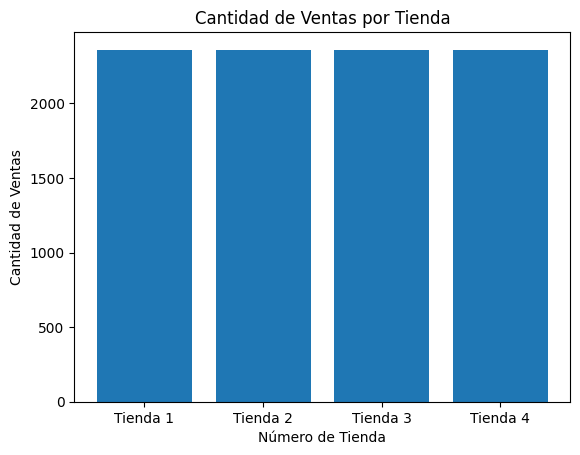

Número de tienda
Tienda 1    2359
Tienda 2    2359
Tienda 3    2359
Tienda 4    2358
dtype: int64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Agrupar por 'Número de tienda' y sumar los precios
ventas_por_tienda = hoja_completa.groupby('Número de tienda')['Preço'].sum()

# Obtener los números de tienda (para el eje x del gráfico)
tiendas = ventas_por_tienda.index

# Crear el gráfico de barras
plt.bar(tiendas, ventas_por_tienda)
plt.xlabel('Número de Tienda')
plt.ylabel('Ventas Totales')
plt.title('Ventas por Tienda')
plt.show()

print(ventas_por_tienda)

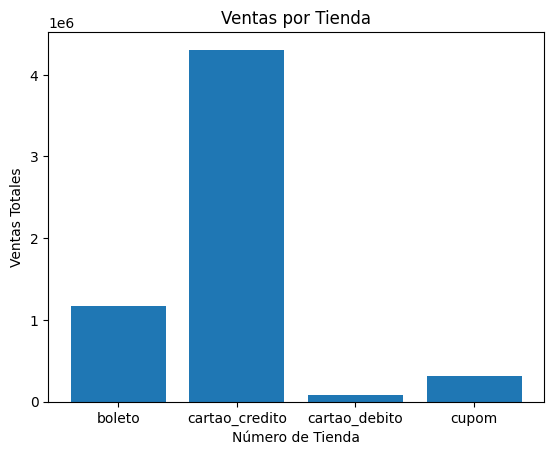

Tipo de pagamento
boleto            1174246.18
cartao_credito    4307472.04
cartao_debito       75277.47
cupom              314495.10
Name: Preço, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Agrupar por 'Número de tienda' y sumar los precios
ventas_por_tienda = hoja_completa.groupby('Tipo de pagamento')['Preço'].sum()

# Obtener los números de tienda (para el eje x del gráfico)
tiendas = ventas_por_tienda.index

# Crear el gráfico de barras
plt.bar(tiendas, ventas_por_tienda)
plt.xlabel('Número de Tienda')
plt.ylabel('Ventas Totales')
plt.title('Ventas por Tienda')
plt.show()

print(ventas_por_tienda)

# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
